In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
def csvRead(filepath):
    data = np.genfromtxt(filepath, delimiter=',', skip_header=1)
    return data

strawberry = csvRead('FLIGHT DATA/2021-05-15_SpruceGooseStrawberryLineCutterFlash.csv')
cherry = csvRead('FLIGHT DATA/2021-05-15_SpruceGooseCherryLineCutterFlash.csv')

In [28]:
def filterData(array):
    deployedRow = np.where(array[:,0] == 2)[0][0]
    landedRow = np.where(array[:,0] == 5)[0][0]
    return array[deployedRow-500:landedRow+100]

def stateTransitionRows(array):
    rows = []
    for i in range(1,6):
        rows.append(np.where(array[:,0] == i)[0][0])
    return rows

def plotData(array, headers, lineColor):
    timeCol = 1
    yColumns = [0, 2, 4, 15, 8, 12, 13]
    numPlots = len(yColumns)
    plotColumns = 1  # (numPlots+1)//2
    stateChangeRows = stateTransitionRows(array)
    print('State changes at times: ', end=' ')
    for i in range(1,6):
        print(array[stateChangeRows[i-1], timeCol], end='  ')
    print()
    fig, axs = plt.subplots(numPlots, plotColumns, figsize=(16, numPlots*4))
    for i in range(numPlots):
        currentAx = axs[i]
        currentAx.plot(array[:,timeCol], array[:,yColumns[i]], linewidth=0.5, color=lineColor)
        currentAx.set_title(headers[yColumns[i]])
        for row in stateChangeRows:
            currentAx.axvline(array[row,timeCol], color='black', linestyle='dotted', linewidth=0.5)
        if (headers[yColumns[i]] == 'Smooth altitude (m)'):
            currentAx.axhline(213, color='black', linestyle='dotted', linewidth=0.5)
            currentAx.axhline(183, color='black', linestyle='dotted', linewidth=0.5)

In [6]:
dataHeaders = ['State', 'Time (ms)', 'Pressure [Pa]', 
               'Altitude (m)', 'Smooth altitude (m)', 'Delta altitude (m/s)', 'Smooth delta altitude (m/s)',
               'Temperature (C)', 'Accel X', 'Accel Y', 'Accel Z',
               'Batt Sense', 'Cut Sense 1', 'Cut Sense 2', 'Current Sense', 'Photoresistor']
dataSets = [strawberry, cherry]

def blackMagic(array, lineColor):
    plotData(filterData(array), dataHeaders, lineColor)

# Spruce Goose flight

Both PCBs moved correctly through all state transitions. Note that the pressure spiked when the main parachute charge went off which led to a dip in smoothed altitude, although this would not have caused an early disreef because the altitudes for disreef were significantly lower than deployment.

In the future, outlier readings should be filtered out.

X-acceleration on this flight was the largest component of acceleration, so it is graphed as a substitute for the total acceleration.

## Strawberry (PCB 1)

State changes at times:  3524425.0  3549887.0  3583809.0  3587273.0  3625804.0  


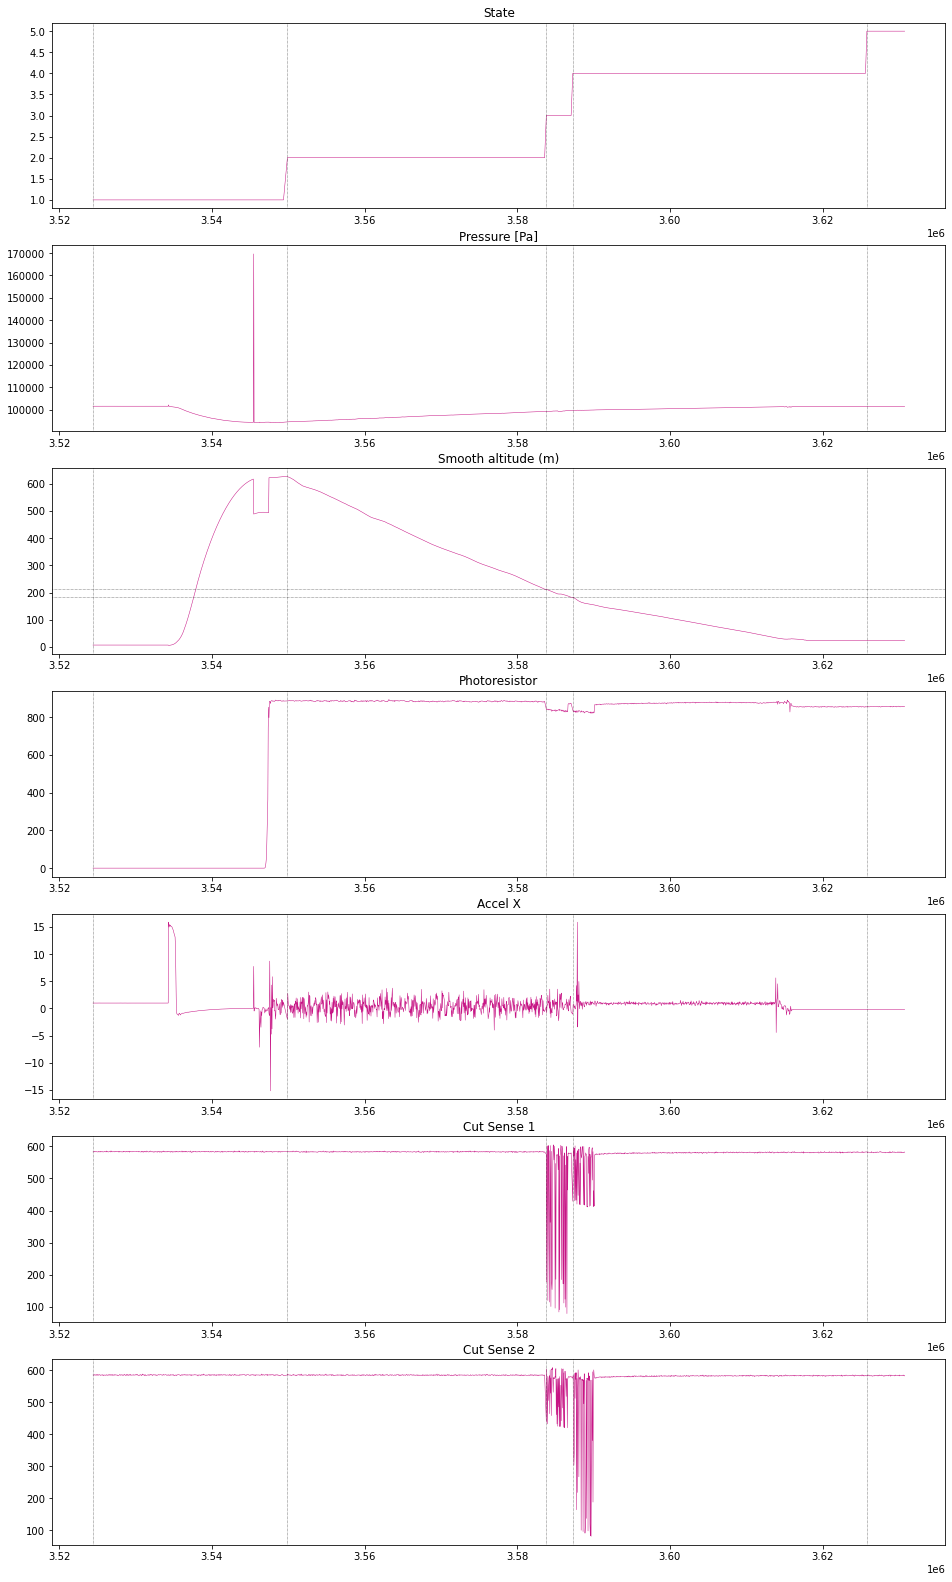

In [29]:
blackMagic(strawberry, 'mediumvioletred')

## Cherry (PCB 2)

State changes at times:  3321511.0  3346762.0  3382284.0  3383848.0  3420825.0  


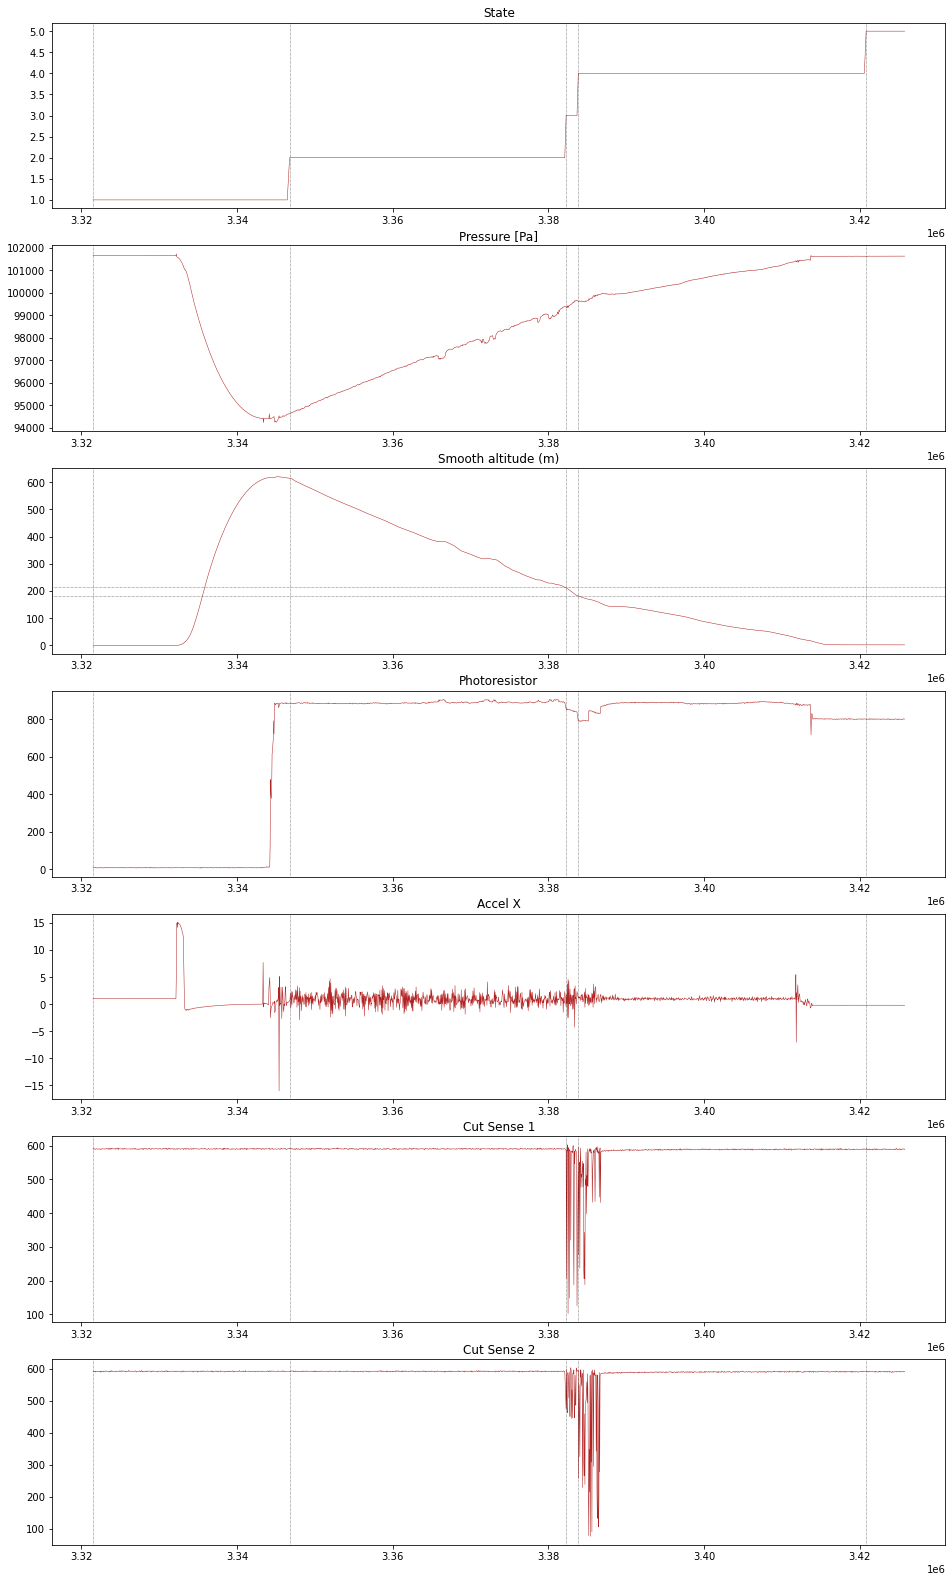

In [30]:
blackMagic(cherry, 'firebrick')